In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
import warnings
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import axes
warnings.simplefilter(action='ignore')
%matplotlib inline

provinces = [10, 41, 50, 70, 90]
province_names = ['Bangkok', 'Udon Thani', 'Ratchaburi', 'Chiang Mai', 'Songkla']
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

true_data = pd.read_csv('../../data/province-month.csv')
true_data = true_data.loc[true_data['province'].isin(provinces) & true_data['date_sick_year'].isin(years)]
true_data['date_sick'] = true_data['date_sick_year'].map(str) + '-' + true_data['month'].map(str)
true_data['date_sick'] = pd.to_datetime(true_data['date_sick'])

true_data.head()

,date_sick_year,month,province,cases,date_sick
38753,2006,1,10,437.0,2006-01-01
38779,2006,1,41,4.0,2006-01-01
38786,2006,1,50,3.0,2006-01-01
38801,2006,1,70,36.0,2006-01-01
38816,2006,1,90,63.0,2006-01-01


In [2]:
# edit graph style here
sns.set()
plt.style.use('seaborn-paper')  # for poster use 'seaborn-poster'

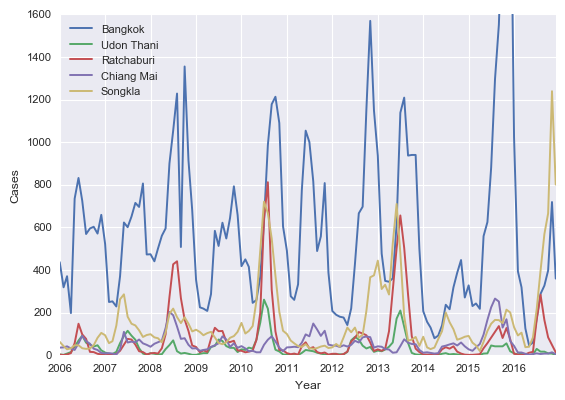

In [8]:
x = []
y = []
for prov in provinces:
    x_prov = true_data['date_sick'].loc[true_data['province'] == prov]
    y_prov = true_data['cases'].loc[true_data['province'] == prov]
    x.append(x_prov)
    y.append(y_prov)

plt.xlabel('Year')
plt.ylabel('Cases')
# plt.title('Cases of DHF')

fig = plt.plot(x[0], y[0], x[1], y[1], x[2], y[2], x[3], y[3], x[4], y[4])
plt.ylim(0,1600)
plt.legend(province_names, loc = 'upper_left')
plt.show()

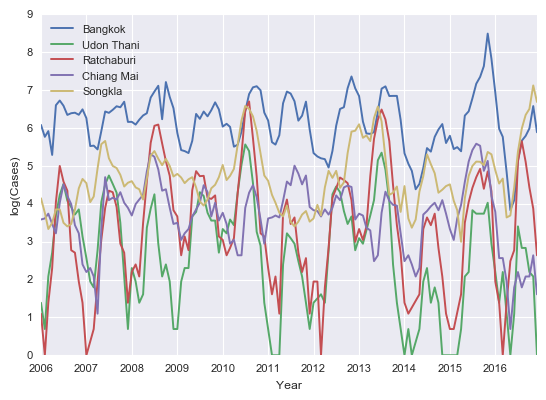

In [9]:
x = []
y = []
for prov in provinces:
    x_prov = true_data['date_sick'].loc[true_data['province'] == prov]
    y_prov = true_data['cases'].loc[true_data['province'] == prov]
    x.append(x_prov)
    y.append(y_prov)

plt.xlabel('Year')
plt.ylabel('log(Cases)')
# plt.title('Cases of DHF')

fig = plt.plot(x[0], np.log(y[0]), x[1], np.log(y[1]), x[2], np.log(y[2]), x[3], np.log(y[3]), x[4], np.log(y[4]))
# plt.ylim(0,1600)
plt.legend(province_names, loc = 'upper_left')
plt.show()

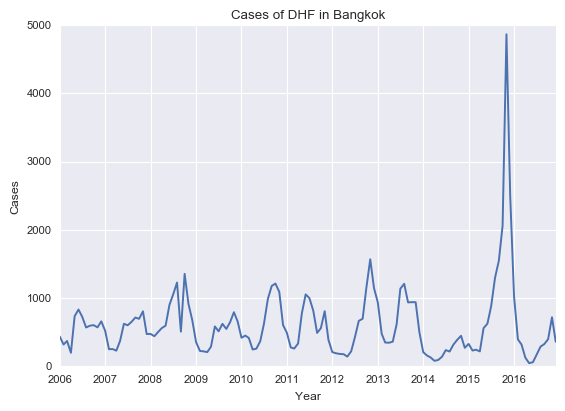

In [6]:
x = true_data['date_sick'].loc[true_data['province'] == 10]
y = true_data['cases'].loc[true_data['province'] == 10]

plt.xlabel('Year')
plt.ylabel('Cases')
plt.title('Cases of DHF in Bangkok')

fig2 = plt.plot(x, y)
plt.show()

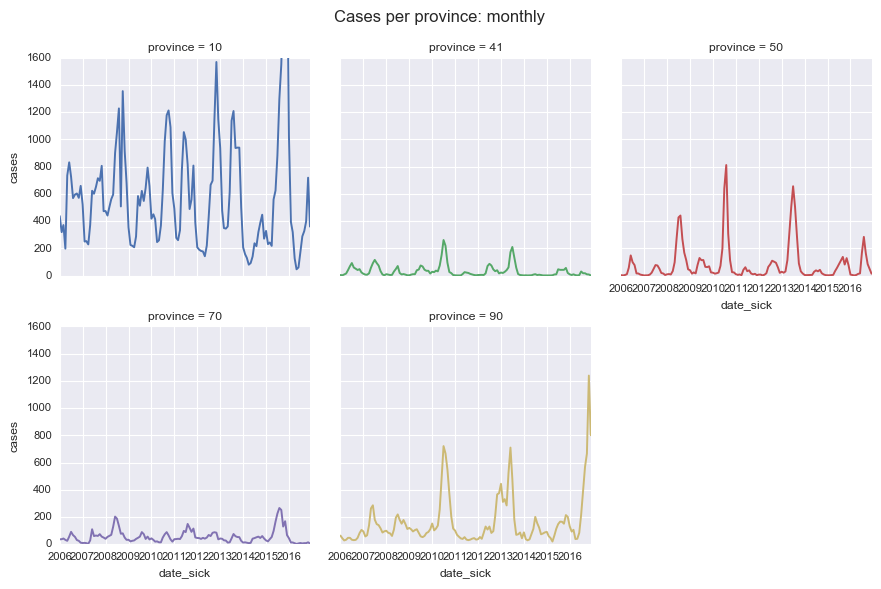

In [16]:
grid = sns.FacetGrid(true_data, col='province', hue = 'province', col_wrap=3)
plt.ylim(0, 1600)
grid.map(plt.plot, 'date_sick', 'cases')
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Cases per province: monthly')